In [4]:
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd
from iminuit import Minuit

In [2]:
#Open data file and read the lines into a list 
with open('datafile-exp.txt') as f:
    lines = f.readlines()
    
decay_t = np.array(lines, dtype = float)         #Create an array from the list of decay times
f.close()

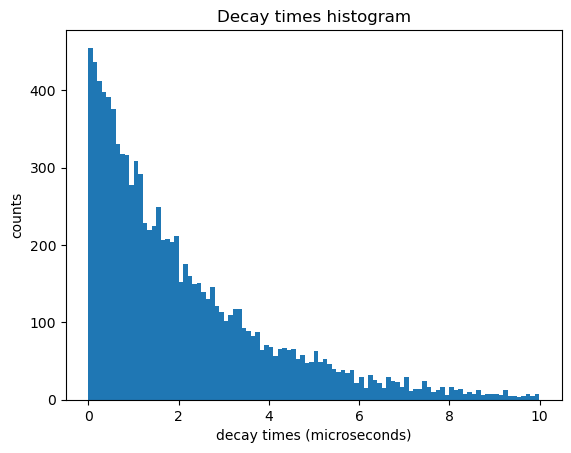

In [3]:
nbins = 100                                                        #Define number of bins
entries, binedges, patches =plt.hist(decay_t,bins = nbins)         #Plot histogram of decay times 
plt.xlabel("decay times (microseconds)")
plt.ylabel("counts")
plt.title("Decay times histogram")
plt.show()

In [4]:
#Function which outputs results from maximum likelihood fit
def showIminuitResult( params, theMinuit ):

    fstr = "{0:8.4f}"
    #For loop that prints value and corresponding error for every parameter
    for pn in params :
        val = theMinuit.values[pn]
        err = theMinuit.errors[pn]
        print('\t','{:15s}'.format(pn), ':  \t', fstr.format(val), ' +/- ', fstr.format(err))
        
    print('\n')



In [5]:
#function which calculates the negative log of the joint likelihood of decay prob. density function normalised over infinity
#Parameter to be estimated is the lifetime tau
def NLL(tau):  
    #Equation for decay probability density function normalised over infinity 
    return -np.sum(np.log((1/tau)*np.exp(-decay_t/tau)))     



In [6]:
#function which calculates the negative log of the joint likelihood of decay prob. density function normalised from [0,10]
def NLL_correctly_normed(tau):
    #Equation for decay probability density function normalised from [0,10]
    return -np.sum(np.log((1/(tau*(np.exp(-0/tau)-np.exp(-10/tau))))*np.exp(-decay_t/tau)))


In [7]:
def run_minim(min_func):
    params = ["tau"]
    #Setting values to start at and estimated errors. 
    startvals = {params[0] : 2.2 }                #Estimate tau parameter at 2.2
    theMinuit = Minuit(min_func, **startvals)     #run Minuit optimiser with with NLL function.
    theMinuit.errors=0.1                          #Errors on initial start value
    
    #Nll increases by 0.5 when you go to either side of the minimum by one unit error on the parameter
    theMinuit.errordef=0.5                        #Set errordef to 0.5 since this a log-likelihood function

    #Run the minimisation
    result = theMinuit.migrad()
    return params, theMinuit




In [8]:
def main():
    
    #call run_minim function with the parameter NLL normalised over infinity
    #The function returns calculated parameters and corresponding errors.
    params,theMinuit = run_minim(NLL)
    
    print ("\nMinuit Results for incorrectly normalised PDF (in microseconds)")
    showIminuitResult( params, theMinuit )  #call function that outputs results
    
    #call run_minim function with the parameter NLL normalised over [0,10]
    #The function returns calculated parameters and corresponding errors.
    params,theMinuit = run_minim(NLL_correctly_normed)
    
    print ("\nMinuit Results  for correctly normalised PDF (in microseconds)")
    showIminuitResult( params, theMinuit )  #call function that outputs results
main()



Minuit Results for incorrectly normalised PDF (in microseconds)
	 tau             :  	   2.0961  +/-    0.0210



Minuit Results  for correctly normalised PDF (in microseconds)
	 tau             :  	   2.2043  +/-    0.0250




In [9]:
"""
There is a difference of approximately 0.1s between the two calculated lifetime values. The first value printed corresponds to
the case where the PDF has been normalised over a range of 0 and infinity which is incorrect because the data has been generated
0 and 10. The value does not agree with the literature value of tau = 2.2 microseconds since the upper bound of the estimated 
tau = 2.09+0.02 = 2.11 microseconds. The second value printed corresponds to the case where the pdf has been correctly 
normalised, over the range [0,10]. This calculated value lies within the its error of the literature value of tau, since 
2.204-0.025 = 2.179 <2.2, and 2.2043 > 2.2. 

The incorrectly normalised pdf fit is smaller than the true value because it assumes that the data has been generated between 
0 and infinity. However, our data has been generated from a region defined between 0 and 10, so when normalised with a 
normalisation factor over 0 to infinity, the integral of the normalised probability is less than 1 and we get a value of tau
that is too low.
"""

'\nThere is a difference of approximately 0.1s between the two calculated lifetime values. The first value printed corresponds to\nthe case where the PDF has been normalised over a range of 0 and infinity which is incorrect because the data has been generated\n0 and 10. The value does not agree with the literature value of tau = 2.2 microseconds since the upper bound of the estimated \ntau = 2.09+0.02 = 2.11 microseconds. The second value printed corresponds to the case where the pdf has been correctly \nnormalised, over the range [0,10]. This calculated value lies within the its error of the literature value of tau, since \n2.204-0.025 = 2.179 <2.2, and 2.2043 > 2.2. \n\nThe incorrectly normalised pdf fit is smaller than the true value because it assumes that the data has been generated between \n0 and infinity. However, our data has been generated from a region defined between 0 and 10, so when normalised with a \nnormalisation factor over 0 to infinity, the integral of the normalise

In [10]:
#Q2)

#Open data file and read the lines into a list 
with open('datafile-expresonance.txt') as f:
    lines = f.readlines()
    
t = np.array(lines, dtype = float)
f.close()

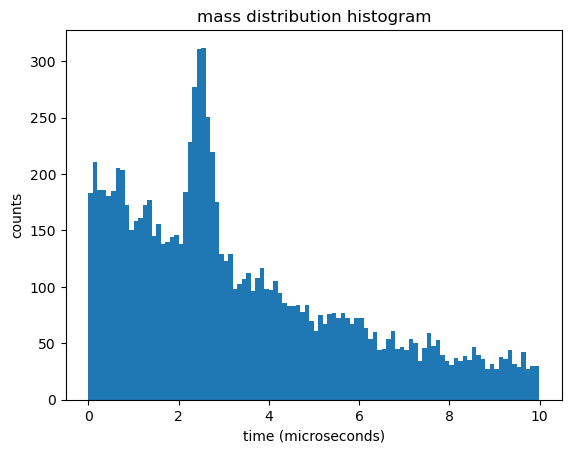

In [11]:
nbins = 100                                            #Define number of bins 
entries, binedges, patches =plt.hist(t,bins = nbins)   #Plot histogram of decay times 
plt.xlabel("time (microseconds)")
plt.ylabel("counts")
plt.title("mass distribution histogram")
plt.show()

In [12]:
#function which calculates the decay prob. density function normalised over [0,10].
def pdf_exp(tau):
    return (1/(tau*(np.exp(-0/tau)-np.exp(-10/tau))))*np.exp(-t/tau)   #decay pdf normalised over [0,10]

#function which calculates the Gaussian prob. density function normalised over a fixed width of 0.2 sigma.
def pdf_Gaus(mu): 
    sig = 0.2       #Fixed width of Gaussian
    return (1/np.sqrt(2*np.pi*sig**2))*np.exp((-(t-mu)**2)/(2*sig**2)) #normalised Gaussian pdf

#function which calculates the negative log of the joint likelihood of the combined probability function.
#The parameters to be estimated are the lifetime (tau), the mean of the Gaussian (mu) and the fraction (f)

def NLLpdf(tau, mu,f):
    exp_fn = pdf_exp(tau)    #call function which returns decay pdf
    Gaus_fn = pdf_Gaus(mu)   #call function which returns Gaussian pdf
   
    return -np.sum(np.log((1-f)*Gaus_fn+(f)*exp_fn))  #return negative log of joint likelihood 
    
    

In [13]:
def run_minim2(min_func):
    params = ["tau","mu","f"]     #Three parameters to be calculated
    
    startvals = {params[0] : 5,params[1] : 2.5,params[2] :0.9 } #give intial parameter estimates as a dictionary
    theMinuit = Minuit(min_func, **startvals)    #Run optimiser with initial parameter guesses
    #initial estimate of errors on the initial start values
    theMinuit.errors=[0.1,0.1,0.1]
    
    #Nll increases by 0.5 when you go to either side of the minimum by one unit error on the parameter
    theMinuit.errordef=0.5                   #Set errordef to 0.5 since this a log-likelihood function

    #Run the minimisation
    result = theMinuit.migrad()
    return params, theMinuit


In [14]:
def main2():
    #Print result
   
    params,theMinuit = run_minim2(NLLpdf)
    
    print ("\nMinuit Results")
    showIminuitResult( params, theMinuit )
    print('Where tau and mu are in microseconds while f is a probability in range (0,1)')

main2()



Minuit Results
	 tau             :  	   5.0432  +/-    0.1027
	 mu              :  	   2.4998  +/-    0.0118
	 f               :  	   0.9029  +/-    0.0045


Where tau and mu are in microseconds while f is a probability in range (0,1)


In [15]:
"""
The lifetime is 5.0432 +/- 0.1027 microseconds which agrees with the given value of 5 microseconds. The calculate mean of 
the Gaussian, 2.4998 +/- 0.0118 microseconds is very accurate to the given value of 2.5 microseconds. Finally, the calculated
probability, f = 0.9029 +/- 0.0045, is also in agreement with the given probability of 0.9.

We can conclude that the fits were successful since we have accurate estimations for all three parameters.




"""

'\nThe lifetime is 5.0432 +/- 0.1027 microseconds which agrees with the given value of 5 microseconds. The calculate mean of \nthe Gaussian, 2.4998 +/- 0.0118 microseconds is very accurate to the given value of 2.5 microseconds. Finally, the calculated\nprobability, f = 0.9029 +/- 0.0045, is also in agreement with the given probability of 0.9.\n\nWe can conclude that the fits were successful since we have accurate estimations for all three parameters.\n\n\n\n\n'